# Putting it all together: a case study

Every year for the past 40-plus years, Peter and Rosemary Grant have gone to the Galápagos island of Daphne Major and collected data on Darwin's finches. Using your skills in statistical inference, you will spend this chapter with their data, and witness first hand, through data, evolution in action. It's an exhilarating way to end the course!

## EDA of beak depths of Darwin's finches

For your first foray into the Darwin finch data, you will study how the beak depth (the distance, top to bottom, of a closed beak) of the finch species Geospiza scandens has changed over time. The Grants have noticed some changes of beak geometry depending on the types of seeds available on the island, and they also noticed that there was some interbreeding with another major species on Daphne Major, Geospiza fortis. These effects can lead to changes in the species over time.

In the next few problems, you will look at the beak depth of G. scandens on Daphne Major in 1975 and in 2012. To start with, let's plot all of the beak depth measurements in 1975 and 2012 in a bee swarm plot.

The data are stored in a pandas DataFrame called df with columns 'year' and 'beak_depth'. The units of beak depth are millimeters (mm).

In [ ]:
Create the beeswarm plot.

Label the axes.

Show the plot.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# load data from csv to DataFrame and concatenate to be df.
f1975 = pd.read_csv(r"C:\Users\Ttaksinavongskul\Documents\DataScienceFolder\datacamp\finch_beaks_1975.csv")# index_col= False)
f2012 = pd.read_csv(r"C:\Users\Ttaksinavongskul\Documents\DataScienceFolder\datacamp\finch_beaks_2012.csv")

# rename columns name
f1975.rename(columns={"Beak length, mm": "blength", "Beak depth, mm": "bdepth" }, inplace= True)

# add columns year
f1975['year']= 1975
f2012['year']= 2012

# select only species Geospiza scandens    #df[df['Population']>1200000000] # use \n for new line print
f1975 = f1975[f1975['species'] == 'scandens']

print('select only scandens in f1975 :\n', f1975)
print(f1975.shape)

f2012 = f2012[f2012['species'] == 'scandens']
print('select only scandens in f2012 :\n', f2012)
print(f2012.shape)


# cancat two year together
df = pd.concat([f1975,f2012])
print('f1975 concatenated with f2012 :\n', df)

#df = pd.concat([f1975, f2012])
#print('head(5) =', df.head(5))
#print('tail(5) =', df.tail(5))
#print(df)

# Create bee swarm plot
_ = sns.swarmplot(x='year', y='bdepth', data=df)

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

# Show the plot
plt.show()

select only scandens in f1975 :
       band   species  blength  bdepth  year
316    302  scandens    13.90    8.40  1975
317    304  scandens    14.00    8.80  1975
318    306  scandens    12.90    8.40  1975
319    310  scandens    13.50    8.00  1975
320    317  scandens    12.90    7.90  1975
..     ...       ...      ...     ...   ...
398  20225  scandens    14.55    9.45  1975
399  20252  scandens    14.05    9.05  1975
400  20255  scandens    14.45    8.75  1975
401  20266  scandens    15.05    9.45  1975
402  20279  scandens    13.25    8.35  1975

[87 rows x 5 columns]
(87, 5)
select only scandens in f2012 :
       band   species  blength  bdepth  year
121  19026  scandens     14.3     9.4  2012
122  19028  scandens     12.5     8.9  2012
123  19029  scandens     13.7     9.5  2012
124  19094  scandens     13.8    11.0  2012
125  19122  scandens     12.0     8.7  2012
..     ...       ...      ...     ...   ...
243  21295  scandens     14.2     9.3  2012
244  21297  scandens   

<Figure size 640x480 with 1 Axes>

It is kind of hard to see if there is a clear difference between the 1975 and 2012 data set. Eyeballing it, it appears as though the mean of the 2012 data set might be slightly higher, and it might have a bigger variance

## plot ecdf()

316    8.40
317    8.80
318    8.40
319    8.00
320    7.90
       ... 
398    9.45
399    9.05
400    8.75
401    9.45
402    8.35
Name: bdepth, Length: 87, dtype: float64
316    True
317    True
318    True
319    True
320    True
       ... 
398    True
399    True
400    True
401    True
402    True
Name: bdepth, Length: 87, dtype: bool
<class 'pandas.core.series.Series'>


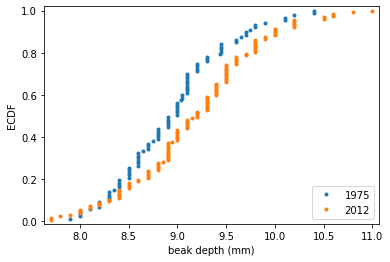

In [3]:
import numpy as np

# define ecdf() function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    
    return x, y

#use f1975 and f2012 that concatenated to df and use as array on ecdf
df_1975 = df[df['year'] == 1975] 
bd_1975 = df_1975['bdepth']
print(bd_1975)
print((bd_1975) == (df[df['year'] == 1975]['bdepth']))

bd_2012 = df[df['year'] == 2012]['bdepth']
 
print(type(bd_2012))


# Compute ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins #is the value between y-axis 
_ = plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

The differences are much clearer in the ECDF. The mean is larger in the 2012 data, and the variance does appear larger as well.

In [ ]:
#note on info from numpyarraydef bootstrap_replicate_1d(data, func):


In [24]: draw_bs_reps(bd_1975, np.mean, size= 10000).size
Out[24]: 10000

In [25]: draw_bs_reps(bd_1975, np.mean, size= 10000).ndim
Out[25]: 1

In [26]: draw_bs_reps(bd_1975, np.mean, size= 10000).shape
Out[26]: (10000,)

In [27]: len(draw_bs_reps(bd_1975, np.mean, size= 10000))
Out[27]: 10000
    
    
def bootstrap_replicate_1d(data, func):
#Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)


def draw_bs_reps(data, func, size=1):
    #Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, size=10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

## Parameter estimates of beak depths

Estimate the difference of the mean beak depth of the G. scandens samples from 1975 and 2012 and report a 95% confidence interval.

Since in this exercise you will use the draw_bs_reps() function you wrote in chapter 2, it may be helpful to refer back to it.

In [28]:
import numpy as np

def bootstrap_replicate_1d(data, func):
#Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    #Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(bd_2012) - np.mean(bd_1975)

# Get bootstrap replicates of means (will got mean of replicates 10000 ea)
bs_replicates_1975 = draw_bs_reps(bd_1975, np.mean, size= 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012, np.mean, size= 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.2262204724409429 mm
95% confidence interval = [0.05786413 0.39174794] mm


## Hypothesis test: Are beaks deeper in 2012?

Your plot of the ECDF and determination of the confidence interval make it pretty clear that the beaks of G. scandens on Daphne Major have gotten deeper. But is it possible that this effect is just due to random chance? In other words, what is the probability that we would get the observed difference in mean beak depth if the means were the same?

Be careful! The hypothesis we are testing is not that the beak depths come from the same distribution. For that we could use a permutation test. The hypothesis is that the means are equal. To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.

In [40]:

import numpy as np


# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

#mean_diff
mean_diff = np.mean(bd_2012) - np.mean(bd_1975)
print('mean_diff :',end="")
print(mean_diff)

# Shift the samples
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, size=10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)
print('p =', ('%.6f'%p))
print("{0:.6f}".format(p))
print(round(p,6))

mean_diff :0.2262204724409429
p = 0.0032
p = 0.003200
0.003200
0.0032


1. Using “%” :- “%” operator is used to format as well as set precision in python. This is similar to “printf” statement in C programming.

2. Using format() :- This is yet another way to format the string for setting precision.

3. Using round(x,n) :- This function takes 2 arguments, number and the number till which we want decimal part rounded.

In [31]:
# Python code to demonstrate precision 
# and round() 
  
# initializing value 
a = 3.4536
# using "%" to print value till 2 decimal places  

print ("The value of number till 2 decimal place(using %) is : ",end="") 
print ('%.2f'%a) 

# using format() to print value till 2 decimal places  
print ("The value of number till 2 decimal place(using format()) is : ",end="") 
print ("{0:.2f}".format(a)) 

# using round() to print value till 2 decimal places  
print ("The value of number till 2 decimal place(using round()) is : ",end="") 
print (round(a,2)) 

The value of number till 2 decimal place(using %) is : 3.45
The value of number till 2 decimal place(using format()) is : 3.45
The value of number till 2 decimal place(using round()) is : 3.45


We get a p-value of 0.0034, which suggests that there is a statistically significant difference. But remember: it is very important to know how different they are! In the previous exercise, you got a difference of 0.2 mm between the means. You should combine this with the statistical significance. Changing by 0.2 mm in 37 years is substantial by evolutionary standards. If it kept changing at that rate, the beak depth would double in only 400 years

# variation of beak shapes

## EDA of beak length and depth

The beak length data are stored as bl_1975 and bl_2012, again with units of millimeters (mm). You still have the beak depth data stored in bd_1975 and bd_2012. Make scatter plots of beak depth (y-axis) versus beak length (x-axis) for the 1975 and 2012 specimens.

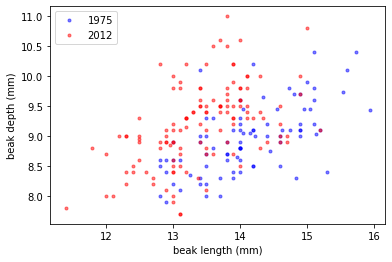

In [5]:
# this have to use linreg ; A function to do pairs bootstrap


import numpy as np
import matplotlib.pyplot as plt


def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps


#load data from array.tolist() and change to array


a = [13.9, 14.0, 12.9, 13.5, 12.9, 14.6, 13.0, 14.2, 14.0, 14.2, 13.1, 15.1, 13.5, 14.4, 14.9, 12.9, 13.0, 14.9, 14.0, 13.8, 13.0, 14.75, 13.7, 13.8, 14.0, 14.6, 15.2, 13.5, 15.1, 15.0, 12.8, 14.9, 15.3, 13.4, 14.2, 15.1, 15.1, 14.0, 13.6, 14.0, 14.0, 13.9, 14.0, 14.9, 15.6, 13.8, 14.4, 12.8, 14.2, 13.4, 14.0, 14.8, 14.2, 13.5, 13.4, 14.6, 13.5, 13.7, 13.9, 13.1, 13.4, 13.8, 13.6, 14.0, 13.5, 12.8, 14.0, 13.4, 14.9, 15.54, 14.63, 14.73, 15.73, 14.83, 15.94, 15.14, 14.23, 14.15, 14.35, 14.95, 13.95, 14.05, 14.55, 14.05, 14.45, 15.05, 13.25]
b = [14.3, 12.5, 13.7, 13.8, 12.0, 13.0, 13.0, 13.6, 12.8, 13.6, 12.95, 13.1, 13.4, 13.9, 12.3, 14.0, 12.5, 12.3, 13.9, 13.1, 12.5, 13.9, 13.7, 12.0, 14.4, 13.5, 13.8, 13.0, 14.9, 12.5, 12.3, 12.8, 13.4, 13.8, 13.5, 13.5, 13.4, 12.3, 14.35, 13.2, 13.8, 14.6, 14.3, 13.8, 13.6, 12.9, 13.0, 13.5, 13.2, 13.7, 13.1, 13.2, 12.6, 13.0, 13.9, 13.2, 15.0, 13.37, 11.4, 13.8, 13.0, 13.0, 13.1, 12.8, 13.3, 13.5, 12.4, 13.1, 14.0, 13.5, 11.8, 13.7, 13.2, 12.2, 13.0, 13.1, 14.7, 13.7, 13.5, 13.3, 14.1, 12.5, 13.7, 14.6, 14.1, 12.9, 13.9, 13.4, 13.0, 12.7, 12.1, 14.0, 14.9, 13.9, 12.9, 14.6, 14.0, 13.0, 12.7, 14.0, 14.1, 14.1, 13.0, 13.5, 13.4, 13.9, 13.1, 12.9, 14.0, 14.0, 14.1, 14.7, 13.4, 13.8, 13.4, 13.8, 12.4, 14.1, 12.9, 13.9, 14.3, 13.2, 14.2, 13.0, 14.6, 13.1, 15.2]
c = [8.4, 8.8, 8.4, 8.0, 7.9, 8.9, 8.6, 8.5, 8.9, 9.1, 8.6, 9.8, 8.2, 9.0, 9.7, 8.6, 8.2, 9.0, 8.4, 8.6, 8.9, 9.1, 8.3, 8.7, 9.6, 8.5, 9.1, 9.0, 9.2, 9.9, 8.6, 9.2, 8.4, 8.9, 8.5, 10.4, 9.6, 9.1, 9.3, 9.3, 8.8, 8.3, 8.8, 9.1, 10.1, 8.9, 9.2, 8.5, 10.2, 10.1, 9.2, 9.7, 9.1, 8.5, 8.2, 9.0, 9.3, 8.0, 9.1, 8.1, 8.3, 8.7, 8.8, 8.6, 8.7, 8.0, 8.8, 9.0, 9.1, 9.74, 9.1, 9.8, 10.4, 8.3, 9.44, 9.04, 9.0, 9.05, 9.65, 9.45, 8.65, 9.45, 9.45, 9.05, 8.75, 9.45, 8.35]
d = [9.4, 8.9, 9.5, 11.0, 8.7, 8.4, 9.1, 8.7, 10.2, 9.6, 8.85, 8.8, 9.5, 9.2, 9.0, 9.8, 9.3, 9.0, 10.2, 7.7, 9.0, 9.5, 9.4, 8.0, 8.9, 9.4, 9.5, 8.0, 10.0, 8.95, 8.2, 8.8, 9.2, 9.4, 9.5, 8.1, 9.5, 8.4, 9.3, 9.3, 9.6, 9.2, 10.0, 8.9, 10.5, 8.9, 8.6, 8.8, 9.15, 9.5, 9.1, 10.2, 8.4, 10.0, 10.2, 9.3, 10.8, 8.3, 7.8, 9.8, 7.9, 8.9, 7.7, 8.9, 9.4, 9.4, 8.5, 8.5, 9.6, 10.2, 8.8, 9.5, 9.3, 9.0, 9.2, 8.7, 9.0, 9.1, 8.7, 9.4, 9.8, 8.6, 10.6, 9.0, 9.5, 8.1, 9.3, 9.6, 8.5, 8.2, 8.0, 9.5, 9.7, 9.9, 9.1, 9.5, 9.8, 8.4, 8.3, 9.6, 9.4, 10.0, 8.9, 9.1, 9.8, 9.3, 9.9, 8.9, 8.5, 10.6, 9.3, 8.9, 8.9, 9.7, 9.8, 10.5, 8.4, 10.0, 9.0, 8.7, 8.8, 8.4, 9.3, 9.8, 8.9, 9.8, 9.1]

bl_1975 = np.array(a)
bl_2012 = np.array(b)
bd_1975 = np.array(c)
bd_2012 = np.array(d)

# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='None', color= 'blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
            linestyle='None', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()


In looking at the plot, we see that beaks got deeper (the red points are higher up in the y-direction), but not really longer. If anything, they got a bit shorter, since the red dots are to the left of the blue dots. So, it does not look like the beaks kept the same shape; they became shorter and deeper.

## Linear regressions
Perform a linear regression for both the 1975 and 2012 data. Then, perform pairs bootstrap estimates for the regression parameters. Report 95% confidence intervals on the slope and intercept of the regression line.

You will use the draw_bs_pairs_linreg() function you wrote back in chapter 2.

As a reminder, its call signature is draw_bs_pairs_linreg(x, y, size=1), and it returns bs_slope_reps and bs_intercept_reps. The beak length data are stored as bl_1975 and bl_2012, and the beak depth data is stored in bd_1975 and bd_2012.

note: np.polyfit(x,y, 1)   1 is how fit the line in graph

In [6]:
# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975, 1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012, 1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = \
        draw_bs_pairs_linreg(bl_1975, bd_1975, size=1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = \
        draw_bs_pairs_linreg(bl_2012, bd_2012, size=1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975, [2.5, 97.5])

intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012, [2.5, 97.5])


# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

1975: slope = 0.4652051691605937 conf int = [0.33974259 0.59081516]
1975: intercept = 2.3908752365842263 conf int = [0.65543829 4.14105174]
2012: slope = 0.462630358835313 conf int = [0.33922121 0.60332635]
2012: intercept = 2.9772474982360198 conf int = [1.15189172 4.63939884]


It looks like they have the same slope, but different intercepts.

## Displaying the linear regression results

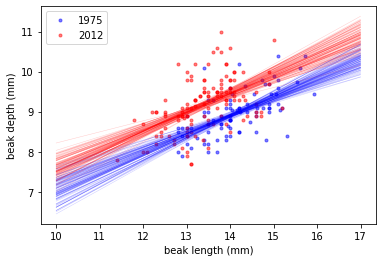

In [8]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([10, 17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x,bs_slope_reps_1975[i] * x + bs_intercept_reps_1975[i] ,
             linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, bs_slope_reps_2012[i] * x + bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color='red')

# Draw the plot again
plt.show()

## Beak length to depth ratio

The linear regressions showed interesting information about the beak geometry. The slope was the same in 1975 and 2012, suggesting that for every millimeter gained in beak length, the birds gained about half a millimeter in depth in both years. However, if we are interested in the shape of the beak, we want to compare the ratio of beak length to beak depth. Let's make that comparison.

Remember, the data are stored in bd_1975, bd_2012, bl_1975, and bl_2012.

## draw_bs_reps(mean_ratio_1975, np.mean, size=10000),   when to use draw_perm_reps ??????



In [10]:
def bootstrap_replicate_1d(data, func):
#Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)


def draw_bs_reps(data, func, size=1):
    #Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


# Compute length-to-depth ratios
ratio_1975 = bl_1975 / bd_1975
ratio_2012 = bl_2012 / bd_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, size=10000)


# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5, 99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)


1975: mean ratio = 1.5788823771858533 conf int = [1.55720328 1.60065209]
2012: mean ratio = 1.4658342276847767 conf int = [1.44457983 1.48813654]


## EDA of heritability

The array bd_parent_scandens contains the average beak depth (in mm) of two parents of the species G. scandens. The array bd_offspring_scandens contains the average beak depth of the offspring of the respective parents. The arrays bd_parent_fortis and bd_offspring_fortis contain the same information about measurements from G. fortis birds.

Make a scatter plot of the average offspring beak depth (y-axis) versus average parental beak depth (x-axis) for both species. Use the alpha=0.5 keyword argument to help you see overlapping points.

Generate scatter plots for both species. Display the data for G. fortis in blue and G. scandens in red.
Set the axis labels, make a legend, and show the plot.

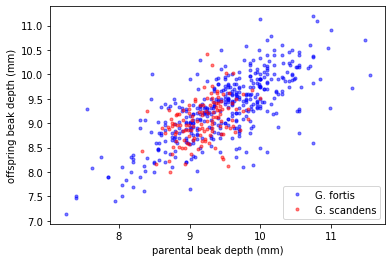

In [11]:
#load data to notebook by nparray.tolist() then np.array()

a = [8.3318, 8.4035, 8.5317, 8.7202, 8.7089, 8.7541, 8.773, 8.8107, 8.7919, 8.8069, 8.6523, 8.6146, 8.6938, 8.7127, 8.7466, 8.7504, 8.7805, 8.7428, 8.7164, 8.8032, 8.8258, 8.856, 8.9012, 8.9125, 8.8635, 8.8258, 8.8522, 8.8974, 8.9427, 8.9879, 8.9615, 8.9238, 8.9351, 9.0143, 9.0558, 9.0596, 8.9917, 8.905, 8.9314, 8.9465, 8.9879, 8.9804, 9.0219, 9.052, 9.0407, 9.0407, 8.9955, 8.9992, 8.9992, 9.0747, 9.0747, 9.5385, 9.4781, 9.4517, 9.3537, 9.2707, 9.1199, 9.1689, 9.1425, 9.135, 9.1011, 9.1727, 9.2217, 9.2255, 9.2821, 9.3235, 9.3198, 9.3198, 9.3198, 9.3273, 9.3725, 9.3989, 9.4253, 9.4593, 9.4442, 9.4291, 9.2632, 9.2293, 9.1878, 9.1425, 9.1275, 9.1802, 9.1765, 9.2481, 9.2481, 9.1991, 9.1689, 9.1765, 9.2406, 9.3198, 9.3235, 9.1991, 9.2971, 9.2443, 9.316, 9.2934, 9.3914, 9.3989, 9.5121, 9.6176, 9.5535, 9.4668, 9.3725, 9.3348, 9.3763, 9.3839, 9.4216, 9.4065, 9.3348, 9.4442, 9.4367, 9.5083, 9.448, 9.4781, 9.595, 9.6101, 9.5686, 9.6365, 9.7119, 9.8213, 9.825, 9.7609, 9.6516, 9.5988, 9.546, 9.6516, 9.7572, 9.8854, 10.0023, 9.3914]
b = [8.419, 9.2468, 8.1532, 8.0089, 8.2215, 8.3734, 8.5025, 8.6392, 8.7684, 8.8139, 8.7911, 8.9051, 8.9203, 8.8747, 8.943, 9.0038, 8.981, 9.0949, 9.2696, 9.1633, 9.1785, 9.1937, 9.2772, 9.0722, 8.9658, 8.9658, 8.5025, 8.4949, 8.4949, 8.5633, 8.6013, 8.6468, 8.1532, 8.3734, 8.662, 8.6924, 8.7456, 8.8367, 8.8595, 8.9658, 8.9582, 8.8671, 8.8671, 8.943, 9.0646, 9.1405, 9.2089, 9.2848, 9.3759, 9.4899, 9.4519, 8.1228, 8.2595, 8.3127, 8.4949, 8.6013, 8.4646, 8.5329, 8.7532, 8.8823, 9.0342, 8.6392, 8.6772, 8.6316, 8.7532, 8.8291, 8.8975, 8.9734, 9.0494, 9.1253, 9.1253, 9.1253, 9.1785, 9.2848, 9.4595, 9.3608, 9.2089, 9.2544, 9.3684, 9.3684, 9.2316, 9.1709, 9.2316, 9.0342, 8.8899, 8.8291, 8.981, 8.8975, 10.4089, 10.1886, 9.7633, 9.7329, 9.6114, 9.5051, 9.5127, 9.3684, 9.6266, 9.5354, 10.0215, 10.0215, 9.6266, 9.6038, 9.4063, 9.2316, 9.338, 9.262, 9.262, 9.4063, 9.4367, 9.0342, 8.943, 8.9203, 8.7835, 8.7835, 9.057, 8.9354, 8.8975, 8.8139, 8.8671, 9.0873, 9.2848, 9.2392, 9.2924, 9.4063, 9.3152, 9.4899, 9.5962, 9.6873, 9.5203, 9.6646]
c = [10.100000000000001, 9.55, 9.399999999999999, 10.25, 10.125, 9.7, 9.05, 7.4, 9.0, 8.65, 9.625, 9.899999999999999, 9.55, 9.05, 8.35, 10.1, 10.1, 9.899999999999999, 10.225, 10.0, 10.55, 10.45, 9.2, 10.2, 8.95, 10.05, 10.2, 9.5, 9.925, 9.95, 10.05, 8.75, 9.2, 10.15, 9.8, 10.7, 10.5, 9.55, 10.55, 10.475, 8.649999999999999, 10.7, 9.1, 9.4, 10.3, 9.65, 9.5, 9.7, 10.525, 9.95, 10.1, 9.75, 10.05, 9.9, 10.0, 9.1, 9.45, 9.25, 9.5, 10.0, 10.524999999999999, 9.899999999999999, 10.399999999999999, 8.95, 9.4, 10.95, 10.75, 10.100000000000001, 8.05, 9.1, 9.55, 9.05, 10.2, 10.0, 10.55, 10.75, 8.175, 9.7, 8.8, 10.75, 9.3, 9.7, 9.600000000000001, 9.75, 9.600000000000001, 10.45, 11.0, 10.85, 10.149999999999999, 10.350000000000001, 10.4, 9.95, 9.1, 10.1, 9.85, 9.625, 9.475, 9.0, 9.25, 9.100000000000001, 9.25, 9.2, 9.95, 8.65, 9.8, 9.4, 9.0, 8.55, 8.75, 9.65, 8.95, 9.15, 9.85, 10.225, 9.825, 10.0, 9.425, 10.4, 9.875, 8.95, 8.9, 9.350000000000001, 10.425, 10.0, 10.175, 9.875, 9.875, 9.15, 9.45, 9.025, 9.7, 9.7, 10.05, 10.3, 9.6, 10.0, 9.8, 10.05, 8.75, 10.55, 9.7, 10.0, 9.85, 9.8, 9.175, 9.649999999999999, 9.55, 9.9, 11.55, 11.3, 10.4, 10.8, 9.8, 10.45, 10.0, 10.75, 9.350000000000001, 10.75, 9.175, 9.65, 8.8, 10.55, 10.675, 9.95, 9.55, 8.825, 9.7, 9.850000000000001, 9.8, 9.55, 9.274999999999999, 10.325, 9.15, 9.35, 9.149999999999999, 9.65, 10.575, 9.975000000000001, 9.55, 9.2, 9.925, 9.2, 9.3, 8.775, 9.325, 9.175, 9.325, 8.975000000000001, 9.7, 9.5, 10.225000000000001, 10.025, 8.2, 8.2, 9.55, 9.05, 9.600000000000001, 9.600000000000001, 10.15, 9.875, 10.485, 11.485, 10.985, 9.7, 9.65, 9.35, 10.05, 10.100000000000001, 9.9, 8.95, 9.3, 9.95, 9.45, 9.5, 8.45, 8.8, 8.525, 9.375, 10.2, 7.625, 8.375, 9.25, 9.4, 10.55, 8.9, 8.8, 9.0, 8.575, 8.575, 9.600000000000001, 9.375, 9.600000000000001, 9.95, 9.6, 10.2, 9.850000000000001, 9.625, 9.025, 10.375, 10.25, 9.3, 9.5, 9.55, 8.55, 9.05, 9.9, 9.8, 9.75, 10.25, 9.1, 9.65, 10.3, 8.9, 9.95, 9.5, 9.774999999999999, 9.425, 7.75, 7.550000000000001, 9.1, 9.6, 9.575, 8.95, 9.649999999999999, 9.65, 9.65, 9.525, 9.85, 9.05, 9.3, 8.899999999999999, 9.45, 10.0, 9.85, 9.25, 10.1, 9.125, 9.65, 9.100000000000001, 8.05, 7.4, 8.85, 9.075, 9.0, 9.7, 8.7, 9.45, 9.7, 8.35, 8.85, 9.7, 9.45, 10.3, 10.0, 10.45, 9.45, 8.5, 8.3, 10.0, 9.225, 9.75, 9.149999999999999, 9.55, 9.0, 9.274999999999999, 9.35, 8.95, 9.875, 8.45, 8.600000000000001, 9.7, 8.55, 9.05, 9.600000000000001, 8.65, 9.2, 8.95, 9.6, 9.15, 9.399999999999999, 8.95, 9.95, 10.55, 9.7, 8.850000000000001, 8.8, 10.0, 9.05, 8.2, 8.1, 7.25, 8.3, 9.15, 8.600000000000001, 9.5, 8.05, 9.425, 9.3, 9.8, 9.3, 9.85, 9.5, 8.65, 9.825, 9.0, 10.45, 9.1, 9.55, 9.05, 10.0, 9.350000000000001, 8.375, 8.3, 8.8, 10.100000000000001, 9.5, 9.75, 10.100000000000001, 9.575, 9.425, 9.65, 8.725, 9.025, 8.5, 8.95, 9.3, 8.85, 8.95, 9.8, 9.5, 8.65, 9.100000000000001, 9.399999999999999, 8.475, 9.35, 7.95, 9.350000000000001, 8.575, 9.05, 8.175, 9.850000000000001, 7.85, 9.850000000000001, 10.1, 9.350000000000001, 8.850000000000001, 8.75, 9.625, 9.25, 9.55, 10.325, 8.55, 9.675, 9.15, 9.0, 9.649999999999999, 8.6, 8.8, 9.0, 9.95, 8.4, 9.35, 10.3, 9.05, 9.975, 9.975000000000001, 8.65, 8.725000000000001, 8.2, 7.8500000000000005, 8.774999999999999, 8.5, 9.4]
d = [10.7, 9.78, 9.48, 9.6, 10.27, 9.5, 9.0, 7.46, 7.65, 8.63, 9.81, 9.4, 9.48, 8.75, 7.6, 10.0, 10.09, 9.74, 9.64, 8.49, 10.15, 10.28, 9.2, 10.01, 9.03, 9.94, 10.5, 9.7, 10.02, 10.04, 9.43, 8.1, 9.5, 9.9, 9.48, 10.18, 10.16, 9.08, 10.39, 9.9, 8.4, 10.6, 8.75, 9.46, 9.6, 9.6, 9.95, 10.05, 10.16, 10.1, 9.83, 9.46, 9.7, 9.82, 10.34, 8.02, 9.65, 9.87, 9.0, 11.14, 9.25, 8.14, 10.23, 8.7, 9.8, 10.54, 11.19, 9.85, 8.1, 9.3, 9.34, 9.19, 9.52, 9.36, 8.8, 8.6, 8.0, 8.5, 8.3, 10.38, 8.54, 8.94, 10.0, 9.76, 9.45, 9.89, 10.9, 9.91, 9.39, 9.86, 9.74, 9.9, 9.09, 9.69, 10.24, 8.9, 9.67, 8.93, 9.3, 8.67, 9.15, 9.23, 9.59, 9.03, 9.58, 8.97, 8.57, 8.47, 8.71, 9.21, 9.13, 8.5, 9.58, 9.21, 9.6, 9.32, 8.7, 10.46, 9.29, 9.24, 9.45, 9.35, 10.19, 9.91, 9.18, 9.89, 9.6, 10.3, 9.45, 8.79, 9.2, 8.8, 9.69, 10.61, 9.6, 9.9, 9.26, 10.2, 8.79, 9.28, 8.83, 9.76, 10.2, 9.43, 9.4, 9.9, 9.5, 8.95, 9.98, 9.72, 9.86, 11.1, 9.14, 10.49, 9.75, 10.35, 9.73, 9.83, 8.69, 9.58, 8.42, 9.25, 10.12, 9.31, 9.99, 8.59, 8.74, 8.79, 9.6, 9.52, 8.93, 10.23, 9.35, 9.35, 9.09, 9.04, 9.75, 10.5, 9.09, 9.05, 9.54, 9.3, 9.06, 8.7, 9.32, 8.4, 8.67, 8.6, 9.53, 9.77, 9.65, 9.43, 8.35, 8.26, 9.5, 8.6, 9.57, 9.14, 10.79, 8.91, 9.93, 10.7, 9.3, 9.93, 9.51, 9.44, 10.05, 10.13, 9.24, 8.21, 8.9, 9.34, 8.77, 9.4, 8.82, 8.83, 8.6, 9.5, 10.2, 8.09, 9.07, 9.29, 9.1, 10.19, 9.25, 8.98, 9.02, 8.6, 8.25, 8.7, 9.9, 9.65, 9.45, 9.38, 10.4, 9.96, 9.46, 8.26, 10.05, 8.92, 9.5, 9.43, 8.97, 8.44, 8.92, 10.3, 8.4, 9.37, 9.91, 10.0, 9.21, 9.95, 8.84, 9.82, 9.5, 10.29, 8.4, 8.31, 9.29, 8.86, 9.4, 9.62, 8.62, 8.3, 9.8, 8.48, 9.61, 9.5, 9.37, 8.74, 9.31, 9.5, 9.49, 9.74, 9.2, 9.24, 9.7, 9.64, 9.2, 7.5, 7.5, 8.7, 8.31, 9.0, 9.74, 9.31, 10.5, 9.3, 8.12, 9.34, 9.72, 9.0, 9.65, 9.9, 10.0, 10.1, 8.0, 9.07, 9.75, 9.33, 8.11, 9.36, 9.74, 9.9, 9.23, 9.7, 8.2, 9.35, 9.49, 9.34, 8.87, 9.03, 9.07, 9.43, 8.2, 9.19, 9.0, 9.2, 9.06, 9.81, 8.89, 9.4, 10.45, 9.64, 9.03, 8.71, 9.91, 8.33, 8.2, 7.83, 7.14, 8.91, 9.18, 8.8, 9.9, 7.73, 9.25, 8.7, 9.5, 9.3, 9.05, 10.18, 8.85, 9.24, 9.15, 9.98, 8.77, 9.8, 8.65, 10.0, 8.81, 8.01, 7.9, 9.41, 10.18, 9.55, 9.08, 8.4, 9.75, 8.9, 9.07, 9.35, 8.9, 8.19, 8.65, 9.19, 8.9, 9.28, 10.58, 9.0, 9.4, 8.91, 9.93, 10.0, 9.37, 7.4, 9.0, 8.8, 9.18, 8.3, 10.08, 7.9, 9.96, 10.4, 9.65, 8.8, 8.65, 9.7, 9.23, 9.43, 9.93, 8.47, 9.55, 9.28, 8.85, 8.9, 8.75, 8.63, 9.0, 9.43, 8.28, 9.23, 10.4, 9.0, 9.8, 9.77, 8.97, 8.37, 7.7, 7.9, 9.5, 8.2, 8.8]


bd_parent_scandens = np.array(a)
bd_offspring_scandens = np.array(b)
bd_parent_fortis = np.array(c)
bd_offspring_fortis = np.array(d)


# Make scatter plots
_ = plt.plot(bd_parent_fortis, bd_offspring_fortis,
             marker='.', linestyle='none', color='blue', alpha=0.5)
_ = plt.plot(bd_parent_scandens, bd_offspring_scandens,
             marker='.', linestyle='none', color='red', alpha=0.5)

# Label axes
_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')

# Add legend
_ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')

# Show plot
plt.show()


It appears as though there is a stronger correlation in G. fortis than in G. scandens. This suggests that beak depth is more strongly inherited in G. fortis. We'll quantify this correlation next.

## Correlation of offspring and parental data

In an effort to quantify the correlation between offspring and parent beak depths, we would like to compute statistics, such as the Pearson correlation coefficient, between parents and offspring. To get confidence intervals on this, we need to do a pairs bootstrap.

You have already written a function to do pairs bootstrap to get estimates for parameters derived from linear regression. Your task in this exercise is to make a new function with call signature draw_bs_pairs(x, y, func, size=1) that performs pairs bootstrap and computes a single statistic on pairs samples defined. The statistic of interest is computed by calling func(bs_x, bs_y). In the next exercise, you will use pearson_r for func.



Set up an array of indices to sample from. (Remember, when doing pairs bootstrap, we randomly choose indices and use those to get the pairs.)
Initialize the array of bootstrap replicates. This should be a one-dimensional array of length size.
Write a for loop to draw the samples.
Randomly choose indices from the array of indices you previously set up.
Extract x values and y values from the input array using the indices you just chose to generate a bootstrap sample.
Use func to compute the statistic of interest from the bootstrap samples of x and y and store it in your array of bootstrap replicates.
Return the array of bootstrap replicates.


## Pearson correlation of offspring and parental data

The Pearson correlation coefficient seems like a useful measure of how strongly the beak depth of parents are inherited by their offspring. Compute the Pearson correlation coefficient between parental and offspring beak depths for G. scandens. Do the same for G. fortis. Then, use the function you wrote in the last exercise to compute a 95% confidence interval using pairs bootstrap.

Remember, the data are stored in bd_parent_scandens, bd_offspring_scandens, bd_parent_fortis, and bd_offspring_fortis.

Compute the 95% confidence interval for both using your bootstrap replicates.

In [13]:
import numpy as np

def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for a single statistic."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=(len(inds)))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)

    return bs_replicates

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute the Pearson correlation coefficients
r_scandens = pearson_r(bd_parent_scandens, bd_offspring_scandens)
r_fortis = pearson_r(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of Pearson r
bs_replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, pearson_r, size= 1000)

bs_replicates_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, pearson_r, size= 1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(bs_replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', r_scandens, conf_int_scandens)
print('G. fortis:', r_fortis, conf_int_fortis)



G. scandens: 0.4117063629401258 [0.26705848 0.54982707]
G. fortis: 0.7283412395518487 [0.67101859 0.77850494]


It is clear from the confidence intervals that beak depth of the offspring of G. fortis parents is more strongly correlated with their offspring than their G. scandens counterparts.

## Measuring heritability

Remember that the Pearson correlation coefficient is the ratio of the covariance to the geometric mean of the variances of the two data sets. This is a measure of the correlation between parents and offspring, but might not be the best estimate of heritability. If we stop and think, it makes more sense to define heritability as the ratio of the covariance between parent and offspring to the variance of the parents alone. In this exercise, you will estimate the heritability and perform a pairs bootstrap calculation to get the 95% confidence interval.

This exercise highlights a very important point. Statistical inference (and data analysis in general) is not a plug-n-chug enterprise. You need to think carefully about the questions you are seeking to answer with your data and analyze them appropriately. If you are interested in how heritable traits are, the quantity we defined as the heritability is more apt than the off-the-shelf statistic, the Pearson correlation coefficient.

Remember, the data are stored in bd_parent_scandens, bd_offspring_scandens, bd_parent_fortis, and bd_offspring_fortis.

In [ ]:
Instructions

Write a function heritability(parents, offspring) that computes heritability defined as the ratio of the covariance of the trait in parents and offspring divided by the variance of the trait in the parents. Hint: Remind yourself of the np.cov() function we covered in the prequel to this course.
Use this function to compute the heritability for G. scandens and G. fortis.
Acquire 1000 bootstrap replicates of the heritability using pairs bootstrap for G. scandens and G. fortis.
Compute the 95% confidence interval for both using your bootstrap replicates.
Print the results.



You have to be careful about how you index covariance_matrix. The covariance of the trait in parents and offspring can be accessed with the index [0,1] while the variance of the trait in the parents can be accessed with the index [0,0].
You can compute the heritability by passing in, for each species, first the parent array and then the offspring array as arguments to the heritability() function.
Use draw_bs_pairs() with heritability as the func argument to generate 1000 bootstrap replicates of the heritability for each species.
Use np.percentile() with the appropriate arguments to compute the 95% confidence intervals. Recall that this means you have to pass in 2.5 and 97.5 in the form of a list as an argument along with the relevant array.


In [19]:
def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    #print('covariance_matrix[0,1] :', covariance_matrix[0,1])
    #print('covariance_matrix[0,0] :', covariance_matrix[0,0])
    #print('covariance_matrix[0,1] :', covariance_matrix[0,1])
    #print('covariance_matrix[0,0] :', covariance_matrix[0,0])
    #print(covariance_matrix)
    return covariance_matrix[0,1] / covariance_matrix[0,0]

#varince of parents and offspring =index [0,1] 
#the variance of the trait in the parents(only, in x-axis) = [0,0].
# [0,1] ==[1,0] and [0,0] == [1,1]


# Compute the heritability
heritability_scandens = heritability(bd_parent_scandens, bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of heritability
replicates_scandens = draw_bs_pairs(
        bd_parent_scandens, bd_offspring_scandens, heritability, size=1000)
        
replicates_fortis = draw_bs_pairs(
        bd_parent_fortis, bd_offspring_fortis, heritability, size=1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)


G. scandens: 0.5485340868685982 [0.35138506 0.74639495]
G. fortis: 0.7229051911438156 [0.6507141  0.79943924]


Here again, we see that G. fortis has stronger heritability than G. scandens. This suggests that the traits of G. fortis may be strongly incorporated into G. scandens by introgressive hybridization

## Is beak depth heritable at all in G. scandens?

The heritability of beak depth in G. scandens seems low. It could be that this observed heritability was just achieved by chance and beak depth is actually not really heritable in the species. You will test that hypothesis here. To do this, you will do a pairs permutation test.


p-val = 0.0
p = 0.000000
0.000000
0.0


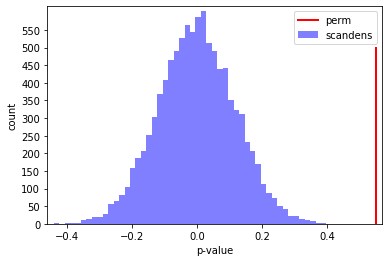

In [50]:
# Initialize array of replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute parent beak depths
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_replicates[i] = heritability(bd_parent_permuted, bd_offspring_scandens)


# Compute p-value: p
p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)

# Print the p-value
print('p-val =', p)

print('p =', ('%.6f'%p))
print("{0:.6f}".format(p))
print(round(p,6))

import matplotlib.pyplot as plt

plt.hist(perm_replicates, bins= 50, color='blue', alpha=0.5 )
plt.plot([heritability_scandens,heritability_scandens], [0,500], color='red', linewidth=2.0)


plt.legend(('perm', 'scandens'), loc= 'upper right')
plt.margins(0.02, 0.02)
#mark number on y-axis
plt.yticks(np.arange(0, 600, 50))

plt.xlabel('p-value')
plt.ylabel('count')
#plt.title('perm_replicates')
plt.show()


#plt.xlabel('p-value')
#plt.ylabel('count')
#plt.title('heritability_scandens')
#plt.show()

You get a p-value of zero, which means that none of the 10,000 permutation pairs replicates you drew had a heritability high enough to match that which was observed. This strongly suggests that beak depth is heritable in G. scandens, just not as much as in G. fortis. If you like, you can plot a histogram of the heritability replicates to get a feel for how extreme of a value of heritability you might expect by chance.